In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#### Выбрала датасет №18.

In [2]:
df = pd.read_csv(r"C:\Users\Полина\Downloads\gender_classification_v7.csv")
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
df.shape

(5001, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [5]:
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

Пропусков нет, все колонки имеют корректный тип данных.

In [6]:
df.duplicated().value_counts()

False    3233
True     1768
dtype: int64

Проверила на наличие дубликатов. Дубликатов в данном датасете: 1768.

In [7]:
df.drop_duplicates(inplace=True)

Удалила дубликаты.

In [8]:
df.duplicated().value_counts()

False    3233
dtype: int64

Дубликатов нет.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
long_hair,3233.0,0.822456,0.382188,0.0,1.0,1.0,1.0,1.0
forehead_width_cm,3233.0,13.217198,1.115993,11.4,12.3,13.2,14.1,15.5
forehead_height_cm,3233.0,5.966038,0.549789,5.1,5.5,5.9,6.4,7.1
nose_wide,3233.0,0.536344,0.498755,0.0,0.0,1.0,1.0,1.0
nose_long,3233.0,0.557686,0.496738,0.0,0.0,1.0,1.0,1.0
lips_thin,3233.0,0.538509,0.498592,0.0,0.0,1.0,1.0,1.0
distance_nose_to_lip_long,3233.0,0.545314,0.498019,0.0,0.0,1.0,1.0,1.0


In [10]:
df.describe(include="object").T

,count,unique,top,freq
gender,3233,2,Male,1783


In [11]:
df.gender.value_counts()

Male      1783
Female    1450
Name: gender, dtype: int64

In [12]:
df.long_hair.value_counts()

1    2659
0     574
Name: long_hair, dtype: int64

In [13]:
df.nose_wide.value_counts()

1    1734
0    1499
Name: nose_wide, dtype: int64

In [14]:
df.nose_long.value_counts()

1    1803
0    1430
Name: nose_long, dtype: int64

In [15]:
df.lips_thin.value_counts()

1    1741
0    1492
Name: lips_thin, dtype: int64

In [16]:
df.distance_nose_to_lip_long.value_counts()

1    1763
0    1470
Name: distance_nose_to_lip_long, dtype: int64

#### Промежуточные выводы:

В данном датасете преобладают данные о мужчинах. Мужчин - 1783, женщин - 1450.

Средняя ширина лба человека из датасета - ~13.2. 

Средняя высота лба человека из датасета - ~6. 

Преобладают люди с длинными волосами.

Людей с широким носом больше, чем с нешироким. Людей с длинным носом больше, чем с не длинным.

Тонкие губы более распространены в данном датасете.

Людей с большим расстоянием между носом и губами больше.



#### Визуализируем данные, полученные описательным анализом.

<Axes: xlabel='forehead_height_cm', ylabel='Count'>

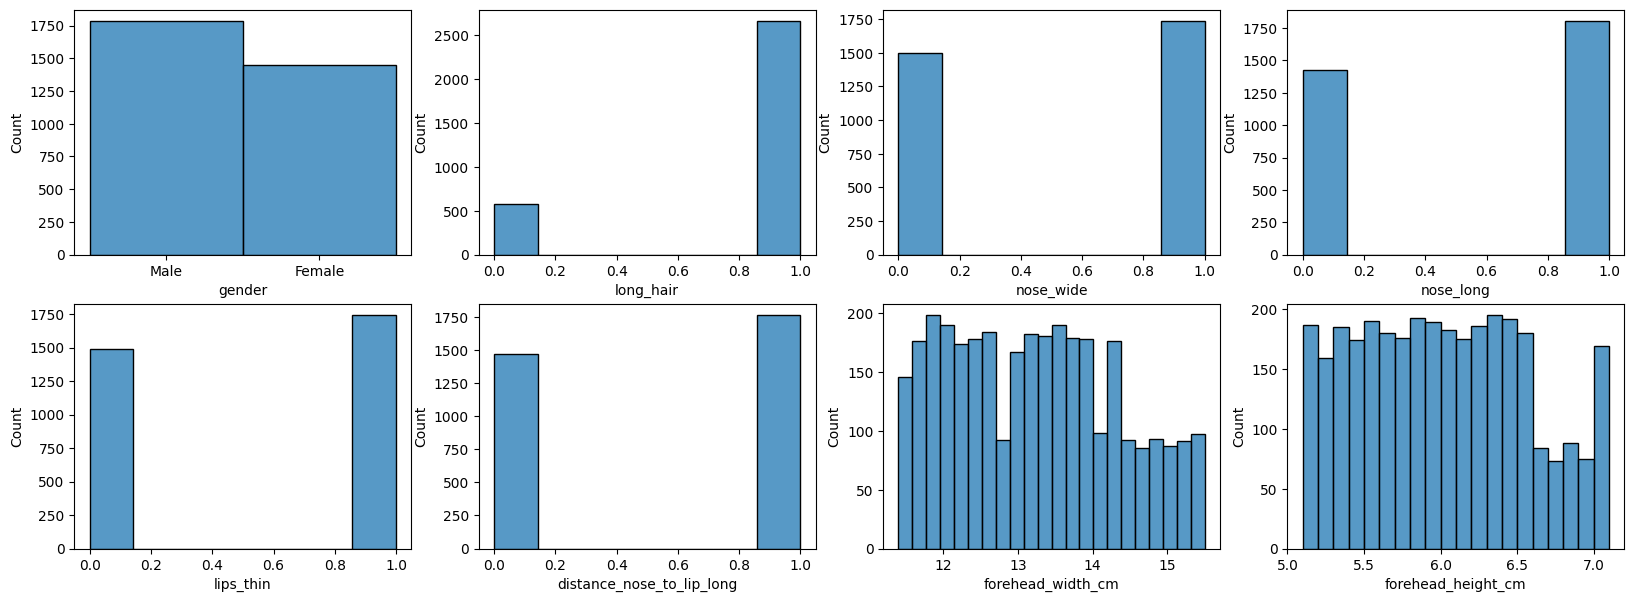

In [17]:
fig, ax = plt.subplots(2, 4, figsize=(20, 7))

sns.histplot(df.gender, ax=ax[0,0])


sns.histplot(df.long_hair, ax=ax[0,1],bins=7)


sns.histplot(df.nose_wide,ax=ax[0,2], bins=7)


sns.histplot(df.nose_long,ax=ax[0,3], bins=7)


sns.histplot(df.lips_thin,ax=ax[1,0], bins=7)


sns.histplot(df.distance_nose_to_lip_long, ax=ax[1,1],bins=7)


sns.histplot(df.forehead_width_cm, ax=ax[1,2],bins=22)


sns.histplot(df.forehead_height_cm, ax=ax[1,3],bins=20)


Можно сделать вывод, что в данном датасете людей с длинными волосами гораздо больше, чем с короткими. В остальном преобладание одного типа над другим не так значительно.

<Axes: >

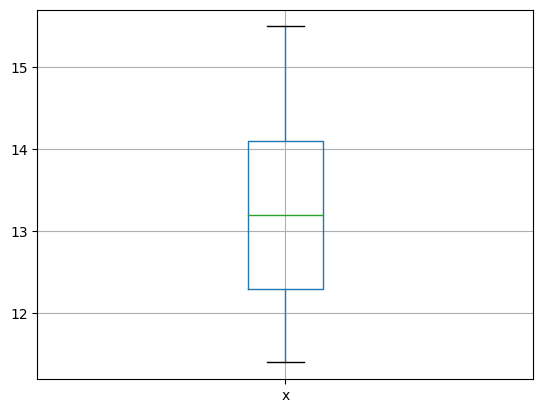

In [18]:
pd.plotting.boxplot(df.forehead_width_cm)

<Axes: >

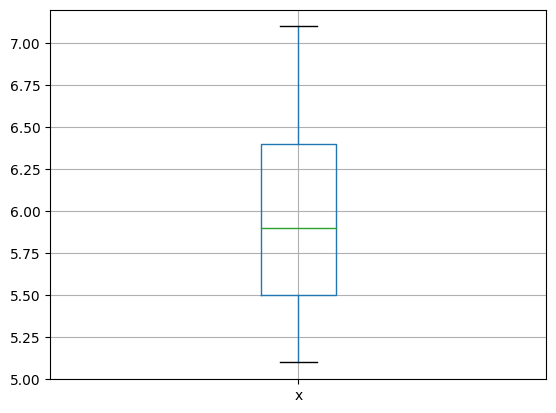

In [19]:
pd.plotting.boxplot(df.forehead_height_cm)

Выбросов по ширине и высоте лба не наблюдается.

In [20]:
df.groupby(by=["long_hair", "gender"], as_index=False)["long_hair", "gender"].value_counts()

C:\Users\Полина\AppData\Local\Temp\ipykernel_21484\2611860967.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by=["long_hair", "gender"], as_index=False)["long_hair", "gender"].value_counts()


,long_hair,gender,count
0,0,Female,266
1,0,Male,308
2,1,Female,1184
3,1,Male,1475


Мужчин с длинными волосами в данном датасете на 10% больше, чем женщин с длинными волосами. Однако около 82% всех женщин из датасета имеют длинные волосы. По данному параметру сложно сказать, насколько сильно он влияет на определение гендера.

In [21]:
df.groupby(by=["nose_wide","nose_long", "gender"], as_index=False)["nose_wide","nose_long", "gender"].value_counts().sort_values(by="count")

C:\Users\Полина\AppData\Local\Temp\ipykernel_21484\2130968476.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by=["nose_wide","nose_long", "gender"], as_index=False)["nose_wide","nose_long", "gender"].value_counts().sort_values(by="count")


,nose_wide,nose_long,gender,count
6,1,1,Female,29
1,0,0,Male,46
4,1,0,Female,218
5,1,0,Male,233
3,0,1,Male,250
2,0,1,Female,270
0,0,0,Female,933
7,1,1,Male,1254


В данном датасете ~39% мужчин с длинным и широким носом, а процент женщин с такими параметрами не составляет и одного, около 29% составляют женщины с коротким и нешироким носом, а мужчин с такими параметрами около 1%. То есть можно сделать вывод, что ширина и длина носа напрямую влияют на определение гендера.

In [22]:
df.groupby(by=["lips_thin", "gender"], as_index=False)["lips_thin", "gender"].value_counts()

C:\Users\Полина\AppData\Local\Temp\ipykernel_21484\3090668627.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by=["lips_thin", "gender"], as_index=False)["lips_thin", "gender"].value_counts()


,lips_thin,gender,count
0,0,Female,1175
1,0,Male,317
2,1,Female,275
3,1,Male,1466


Около 82% мужчин имеют тонкие губы, а ситуация с женщинами абсолютно противоположна. Около 81% женщин имеют пухлые губы. Можно сделать вывод, что параметр с толщиной губ сильно влияет на определение гендера. 

In [23]:
df.groupby(by=["distance_nose_to_lip_long", "gender"], as_index=False)["distance_nose_to_lip_long", "gender"].value_counts()

C:\Users\Полина\AppData\Local\Temp\ipykernel_21484\4199499059.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by=["distance_nose_to_lip_long", "gender"], as_index=False)["distance_nose_to_lip_long", "gender"].value_counts()


,distance_nose_to_lip_long,gender,count
0,0,Female,1177
1,0,Male,293
2,1,Female,273
3,1,Male,1490


У около 81% женщин из данного датасета небольшое расстояние между носом и губами. У мужчин ситуация противоположна, около 84% имеют большое расстояние между носом и ртом. Можно сказать, что данный параметр сильно влияет на определение гендера.

##### Построим матрицу корреляций:

interval columns not set, guessing: ['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']


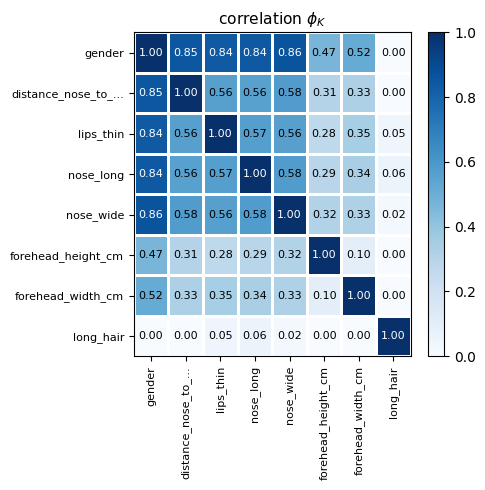

In [24]:
phik_overview = df.phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Blues", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.8, figsize=(5, 5))
plt.tight_layout()

#### Выводы:

Матрица корреляций подтверждает промежуточные выводы, сделанные выше.

Самый большой коэффициент корреляции между определением гендера и шириной носа, он составляет 0.86, что достаточно близко к единице. Это подтверждает предположения о влиянии данного параметра на определение гендера.

Далее следует большой коэффициент корреляции между определением гендера и расстоянием между носом и ртом, он равен 0.85, что так же подтверждает промежуточный вывод о влиянии данного параметра.

Ширина губ и длина носа имеют одинаковый коэффициент корреляции с определением гендера, данные коэффициенты равны 0.84, что тоже говорит о том, что промежуточные выводы о влиянии данных параметров верны.

А длина волос, например, никак не влиет на определение гендера.

Есть небольшие зависимости между расстоянием между носом и ртом и шириной/длиной носа, и шириной губ. Также небольшая зависимость между длиной носа и шириной губ.

### Обучение модели:

Модель будет решать задачу классификации. По входным данным будет определять гендер человека.

In [25]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4986,1,11.7,6.1,1,1,0,1,Male
4990,1,12.6,5.7,0,0,1,0,Female
4992,1,14.1,7.0,1,1,1,1,Male
4993,1,11.6,5.9,0,0,0,1,Female


In [26]:
df.gender = df.gender.apply(lambda x: 1 if x=='Male' else 0)

In [27]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4986,1,11.7,6.1,1,1,0,1,1
4990,1,12.6,5.7,0,0,1,0,0
4992,1,14.1,7.0,1,1,1,1,1
4993,1,11.6,5.9,0,0,0,1,0


Мужской пол - 1, женский - 0.

In [28]:
features = df.drop(["gender"], axis=1)
target=df.gender

In [29]:
features_train, features_val, target_train, target_val = train_test_split(features, target, test_size=0.5, random_state=30)

In [30]:
target_train.value_counts()

1    896
0    720
Name: gender, dtype: int64

Дисбаланса классов нет.

Для оценки качества выбрала метрику f1-score, так как она объединяет в себе точность и полноту и позволяет оценить общую эффективность модели.

Обучим дерево решений:

Text(0, 0.5, 'f1')

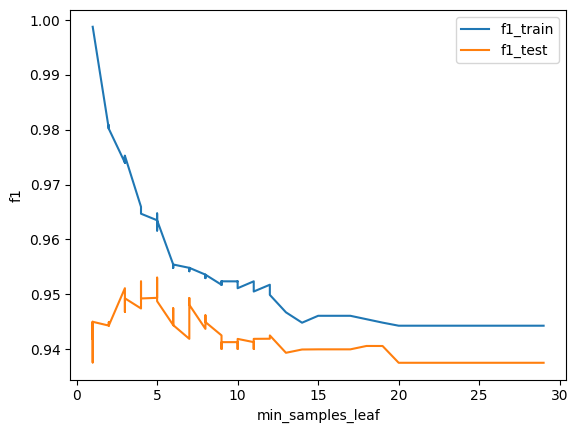

In [31]:
res = []
for param in range(1, 30, 1):
    for n in range(1, 60, 5):
        model = DecisionTreeClassifier(min_samples_leaf=param, random_state=n)

        model.fit(features_train, target_train)
        pred_train = model.predict(features_train)
        pred_test = model.predict(features_val)

        res.append([param, n, f1_score(pred_train, target_train, average='weighted'), f1_score(pred_test, target_val, average='weighted')])
        
res_pd = pd.DataFrame(res, columns=['min_samples_leaf', 'random_state', 'f1_train', 'f1_test'])

res_pd.set_index('min_samples_leaf')['f1_train'].plot(label='f1_train')
res_pd.set_index('min_samples_leaf')['f1_test'].plot(label='f1_test')
plt.legend()
plt.ylabel('f1')

In [32]:
res_pd[res_pd['f1_test'] == res_pd['f1_test'].max()]

,min_samples_leaf,random_state,f1_train,f1_test
56,5,41,0.962861,0.953036


Лучший результат при 5 узлах и random_state = 41. Качество на тестовой выборке: 0.953036.

Обучим случайный лес решений:

In [33]:
res = []
for n in range(1, 20):
    for n_tree in range(1,20):
        for n2 in range(1,20):
            model = RandomForestClassifier(n_estimators=n_tree, min_samples_leaf=n, random_state=n2)

            model.fit(features_train, target_train)
            pred_train3 = model.predict(features_train)
            pred_test3= model.predict(features_val)

            res.append([n, n_tree, n2, f1_score(pred_train3, target_train, average="weighted"), f1_score(pred_test3, target_val, average="weighted")])

res_pd = pd.DataFrame(res, columns=['n', 'n_tree','random_state', 'f1_train', 'f1_test'])


In [ ]:
res_pd[res_pd['f1_test'] == res_pd['f1_test'].max()]

,n,n_tree,random_state,f1_train,f1_test
6662,19,9,13,0.958457,0.970902


Лучший результат при 19 узлах, 9 деревьях и random_state = 13 в ансамбле. Качество на тестовой выборке: 0.970902.

In [ ]:
features_train_xgb, features_test, target_train_xgb, target_test = train_test_split(features_train, target_train, test_size=0.2, random_state=40)

In [ ]:
res=[]
for n in range(1,30):  
    for n1 in range(1,30):  
        model = XGBClassifier(n_estimators=n, max_depth=n1, learning_rate=0.1)

        model.fit(features_train_xgb, target_train_xgb, eval_set=[(features_train_xgb, target_train_xgb), (features_test, target_test)])
        pred_train = model.predict(features_train)
        pred_test = model.predict(features_val)
        res.append([n, n_tree, f1_score(pred_train, target_train, average="weighted"), f1_score(pred_test3, target_val, average="weighted")])

res_pd = pd.DataFrame(res, columns=['n', 'n1', 'f1_train', 'f1_test'])

print(f'Качество на обучающей выборке: {f1_score(pred_train, target_train, average="weighted")}')
print(f'Качество на валидационной выборке: {f1_score(pred_test, target_val, average="weighted")}')


[0]	validation_0-logloss:0.65087	validation_1-logloss:0.65479
[0]	validation_0-logloss:0.63370	validation_1-logloss:0.63553
[0]	validation_0-logloss:0.61798	validation_1-logloss:0.61851
[0]	validation_0-logloss:0.61459	validation_1-logloss:0.61559
[0]	validation_0-logloss:0.61360	validation_1-logloss:0.61551
[0]	validation_0-logloss:0.61270	validation_1-logloss:0.61593
[0]	validation_0-logloss:0.61265	validation_1-logloss:0.61572
[0]	validation_0-logloss:0.61265	validation_1-logloss:0.61572
[0]	validation_0-logloss:0.61265	validation_1-logloss:0.61572
[0]	validation_0-logloss:0.61265	validation_1-logloss:0.61572
[0]	validation_0-logloss:0.61265	validation_1-logloss:0.61572
[0]	validation_0-logloss:0.61265	validation_1-logloss:0.61572
[0]	validation_0-logloss:0.61265	validation_1-logloss:0.61572
[0]	validation_0-logloss:0.61265	validation_1-logloss:0.61572
[0]	validation_0-logloss:0.61265	validation_1-logloss:0.61572
[0]	validation_0-logloss:0.61265	validation_1-logloss:0.61572
[0]	vali

In [ ]:
res_pd[res_pd['f1_test'] == res_pd['f1_test'].max()]

,n,n1,f1_train,f1_test
0,1,19,0.826410,0.961007
1,1,19,0.826410,0.961007
2,1,19,0.944278,0.961007
3,1,19,0.947390,0.961007
4,1,19,0.949147,0.961007
...,...,...,...,...
836,29,19,0.969672,0.961007
837,29,19,0.969672,0.961007
838,29,19,0.969672,0.961007
839,29,19,0.969672,0.961007


Можно сделать вывод, что качество метрики не зависит от количества деревьев в ансамбле, однако зависит от количества узлов при градиентном бустинге. Лучшее качество при 19 узлах.

In [ ]:
model = XGBClassifier(n_estimators=100, max_depth=19, learning_rate=0.1)
model.fit(features_train_xgb, target_train_xgb, eval_set=[(features_train_xgb, target_train_xgb), (features_test, target_test)], 
            early_stopping_rounds=20)

[0]	validation_0-logloss:0.61265	validation_1-logloss:0.61572
[1]	validation_0-logloss:0.54600	validation_1-logloss:0.55126
[2]	validation_0-logloss:0.49016	validation_1-logloss:0.49737
[3]	validation_0-logloss:0.44318	validation_1-logloss:0.45350
[4]	validation_0-logloss:0.40259	validation_1-logloss:0.41457
[5]	validation_0-logloss:0.36747	validation_1-logloss:0.38174
[6]	validation_0-logloss:0.33596	validation_1-logloss:0.35125
[7]	validation_0-logloss:0.30908	validation_1-logloss:0.32696
[8]	validation_0-logloss:0.28487	validation_1-logloss:0.30351
[9]	validation_0-logloss:0.26404	validation_1-logloss:0.28507
[10]	validation_0-logloss:0.24562	validation_1-logloss:0.26851
[11]	validation_0-logloss:0.22868	validation_1-logloss:0.25317
[12]	validation_0-logloss:0.21379	validation_1-logloss:0.23927
[13]	validation_0-logloss:0.20064	validation_1-logloss:0.22837
[14]	validation_0-logloss:0.18889	validation_1-logloss:0.21888
[15]	validation_0-logloss:0.17763	validation_1-logloss:0.20908
[1

c:\Users\Полина\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-logloss:0.10850	validation_1-logloss:0.15595
[26]	validation_0-logloss:0.10442	validation_1-logloss:0.15250
[27]	validation_0-logloss:0.10063	validation_1-logloss:0.15056
[28]	validation_0-logloss:0.09730	validation_1-logloss:0.14767
[29]	validation_0-logloss:0.09402	validation_1-logloss:0.14473
[30]	validation_0-logloss:0.09096	validation_1-logloss:0.14287
[31]	validation_0-logloss:0.08809	validation_1-logloss:0.14104
[32]	validation_0-logloss:0.08528	validation_1-logloss:0.13864
[33]	validation_0-logloss:0.08274	validation_1-logloss:0.13689
[34]	validation_0-logloss:0.08032	validation_1-logloss:0.13517
[35]	validation_0-logloss:0.07799	validation_1-logloss:0.13392
[36]	validation_0-logloss:0.07595	validation_1-logloss:0.13222
[37]	validation_0-logloss:0.07411	validation_1-logloss:0.13059
[38]	validation_0-logloss:0.07231	validation_1-logloss:0.12962
[39]	validation_0-logloss:0.07066	validation_1-logloss:0.12858
[40]	validation_0-logloss:0.06900	validation_1-logloss:

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=19, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
model.best_ntree_limit

45

Лучший результат при 45 деревьях.

In [ ]:
model = XGBClassifier(n_estimators=45, max_depth=19, learning_rate=0.1)

model.fit(features_train_xgb, target_train_xgb, eval_set=[(features_train_xgb, target_train_xgb), (features_test, target_test)])
pred_train = model.predict(features_train)
pred_test = model.predict(features_val)

print(f'Качество на обучающей выборке: {f1_score(pred_train, target_train, average="weighted")}')
print(f'Качество на валидационной выборке: {f1_score(pred_test, target_val, average="weighted")}')

[0]	validation_0-logloss:0.61265	validation_1-logloss:0.61572
[1]	validation_0-logloss:0.54600	validation_1-logloss:0.55126
[2]	validation_0-logloss:0.49016	validation_1-logloss:0.49737
[3]	validation_0-logloss:0.44318	validation_1-logloss:0.45350
[4]	validation_0-logloss:0.40259	validation_1-logloss:0.41457
[5]	validation_0-logloss:0.36747	validation_1-logloss:0.38174
[6]	validation_0-logloss:0.33596	validation_1-logloss:0.35125
[7]	validation_0-logloss:0.30908	validation_1-logloss:0.32696
[8]	validation_0-logloss:0.28487	validation_1-logloss:0.30351
[9]	validation_0-logloss:0.26404	validation_1-logloss:0.28507
[10]	validation_0-logloss:0.24562	validation_1-logloss:0.26851
[11]	validation_0-logloss:0.22868	validation_1-logloss:0.25317
[12]	validation_0-logloss:0.21379	validation_1-logloss:0.23927
[13]	validation_0-logloss:0.20064	validation_1-logloss:0.22837
[14]	validation_0-logloss:0.18889	validation_1-logloss:0.21888
[15]	validation_0-logloss:0.17763	validation_1-logloss:0.20908
[1

[19]	validation_0-logloss:0.14271	validation_1-logloss:0.18065
[20]	validation_0-logloss:0.13577	validation_1-logloss:0.17570
[21]	validation_0-logloss:0.12926	validation_1-logloss:0.17088
[22]	validation_0-logloss:0.12348	validation_1-logloss:0.16596
[23]	validation_0-logloss:0.11800	validation_1-logloss:0.16246
[24]	validation_0-logloss:0.11318	validation_1-logloss:0.15890
[25]	validation_0-logloss:0.10850	validation_1-logloss:0.15595
[26]	validation_0-logloss:0.10442	validation_1-logloss:0.15250
[27]	validation_0-logloss:0.10063	validation_1-logloss:0.15056
[28]	validation_0-logloss:0.09730	validation_1-logloss:0.14767
[29]	validation_0-logloss:0.09402	validation_1-logloss:0.14473
[30]	validation_0-logloss:0.09096	validation_1-logloss:0.14287
[31]	validation_0-logloss:0.08809	validation_1-logloss:0.14104
[32]	validation_0-logloss:0.08528	validation_1-logloss:0.13864
[33]	validation_0-logloss:0.08274	validation_1-logloss:0.13689
[34]	validation_0-logloss:0.08032	validation_1-logloss:

### Вывод

Обучила три модели: дерево решений, случайный лес решений и модель градиентного бустинга. Данные модели были обучены для решения задачи классификации - определения гендера человека по входным данным, описывающим некоторые параметры человека.

Лучший результат на валидационной выборке модели дерева решений - 0.953036.

Лучший результат на валидационной выборке модели случайного леса решений - 0.970902.

Лучший результат на валидационной выборке модели градиентного бустинга - 0.960440723394941.

Лучший результат на валидационной выборке - 0.970902. Хороший результат. Поэтому из всех вариантов лучшей является модель случайного леса решений при 19 узлах, 9 деревьях и random_state = 13 в ансамбле.

Для вычисления F1-score необходимо иметь реальные и предсказанные значения классов, поэтому для решения данной задачи классификации необходимо использовать машинное обучение, чтобы получить модель, которая будет предсказывать классы объектов. Использование dummy-предсказаний не даст реальных значений классов и не позволит вычислить F1-score.